## 分類器の精度指標

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

In [3]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

### confusion matrix (混同行列)

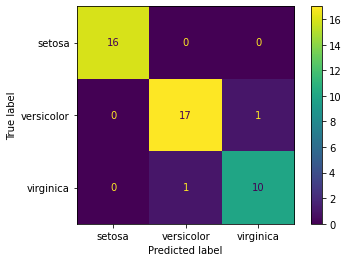

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

### Accuracy

In [6]:
# サンプルデータ
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

In [11]:
# Positive, Negativeに偏りのあるデータだと, 
# すべてPositive もしくは すべてNegative に分類しても大きくなってしまう
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5

### Precision

In [9]:
# Positive と分類したうち, どれだけ正解しているか
# Positive ばかりのデータだと, すべてPositive と分類しても大きくなってしまう
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.6

### Recall(再現率), (Sensitivity(感度))

In [12]:
# Positive であるデータのうち, どれだけ正解しているか(Positive と分類できたか)
# Positive ばかりのデータだと, すべて Positive と分類しても大きくなってしまう
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.6

### Specificity(特異度)

In [13]:
# Negative であるデータのうち, どれだけ正解しているか(Negative と分類できたか)
# Negative ばかりのデータだと, すべて Negative と分類しても大きくなってしまう
import numpy as np
np.array(y_true)!=1

array([False, False,  True, False,  True,  True, False, False])

In [14]:
# Specificity のライブラリがないので Recallのライブラリを利用
# 正解ラベル, 予測ラベルの 0, 1 を反転させる
recall_score(np.array(y_true)!=1, np.array(y_pred)!=1)

0.3333333333333333

### 多クラス評価におけるPrecision

In [15]:
# データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

In [20]:
# average=None
print('average=None: ', precision_score(y_test, y_pred, average=None)) # precision_score(y_test, y_pred, average=None).mean()

# average=macro
print('average=macro: ', precision_score(y_test, y_pred, average='macro'))

# average=micro
print('average=micro: ', precision_score(y_test, y_pred, average='micro'))

# same as accuracy
print('same as accuracy: ', accuracy_score(y_test, y_pred))

average=None:  [1.         0.94444444 0.90909091]
average=macro:  0.9511784511784511
average=micro:  0.9555555555555556
same as accuracy:  0.9555555555555556


### Precision Recall Curve

In [23]:
import pandas as pd
df = pd.read_csv('data/heart_preprocessed.csv')
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#　モデル構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [31]:
y_pred_proba[:5]

array([[0.49557046, 0.50442954],
       [0.28325193, 0.71674807],
       [0.99733359, 0.00266641],
       [0.06907212, 0.93092788],
       [0.47932518, 0.52067482]])

In [26]:
model.classes_

array([0, 1], dtype=int64)

In [32]:
X_test[:5]

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
993,41,110,172,158,0.0,0,1,0,0,1,1,0,1,0,0,0,0,1
859,57,154,232,164,0.0,1,1,1,0,0,1,0,1,0,0,0,1,0
298,62,120,267,99,1.8,2,1,0,0,1,1,0,0,1,1,0,0,1
553,42,120,240,194,0.8,0,1,0,1,0,0,0,0,0,0,1,0,1
672,58,105,240,154,0.6,0,1,0,1,0,1,0,1,1,1,0,0,1


In [33]:
y_test[:5]

993    0
859    0
298    0
553    1
672    1
Name: target, dtype: int64

In [28]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds  = precision_recall_curve(y_test, y_pred_proba[:, 1])

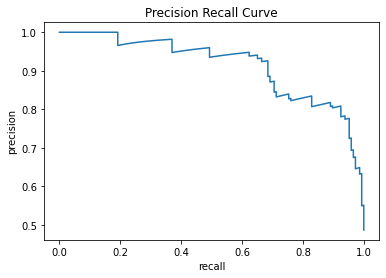

In [30]:
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [34]:
# recallとprecisionの最後の要素はそれぞれ0, 1で，それに対応するthresholdsはない
print(recall[-1])
print(precision[-1])
print(len(recall))
print(len(precision))
print(len(thresholds))

0.0
1.0
210
210
209


### F値

In [35]:
from sklearn.metrics import f1_score, recall_score, precision_score
y_true = [1, 0, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

# F1
print(f1_score(y_true, y_pred))
# recall
print(recall_score(y_true, y_pred))
# precision
print(precision_score(y_true, y_pred))

0.4444444444444445
0.5
0.4


In [36]:
# 調和平均ver
from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.4444444444444444

### Threshold vs Precision, Recall, Fscore

In [37]:
# それぞれのprecisionとrecallにおけるF値(調和平均)を計算
f1_scores = [hmean([p, r]) for p, r in zip(precision, recall)]

89th threshold(=0.44) is the highest f1 score = 0.86


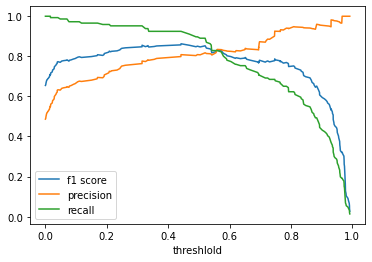

In [38]:
plt.plot(thresholds, f1_scores[:-1], label='f1 score')
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('threshlold')
plt.legend()
print(f'{np.argmax(f1_scores)}th threshold(={thresholds[np.argmax(f1_scores)]:.2f}) is the highest f1 score = {np.max(f1_scores):.2f}')

### ROC

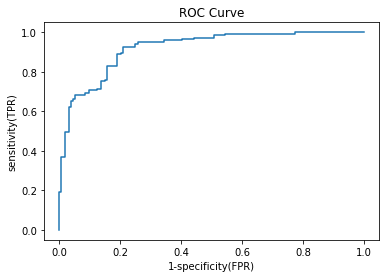

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
# 描画
plt.plot(fpr, tpr)
plt.xlabel('1-specificity(FPR)')
plt.ylabel('sensitivity(TPR)')
plt.title('ROC Curve')
plt.show()

### AUC

In [40]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9196762141967622

## 多クラスROC

### データ準備

In [41]:
# データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル学習
model = LogisticRegression()
model.fit(X_train, y_train)

# 予測
y_pred_proba = model.predict_proba(X_test)

### macro平均

In [44]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)

In [45]:
y_test_one_hot[:5]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [46]:
n_classes = len(model.classes_)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [47]:
fpr

{0: array([0., 0., 0., 1.]),
 1: array([0.        , 0.        , 0.        , 0.07407407, 0.07407407,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.02941176, 0.02941176,
        1.        ])}

In [48]:
tpr

{0: array([0.    , 0.0625, 1.    , 1.    ]),
 1: array([0.        , 0.05555556, 0.94444444, 0.94444444, 1.        ,
        1.        ]),
 2: array([0.        , 0.09090909, 0.81818182, 0.81818182, 1.        ,
        1.        ])}

In [49]:
roc_auc

{0: 1.0, 1: 0.9958847736625515, 2: 0.9946524064171123}

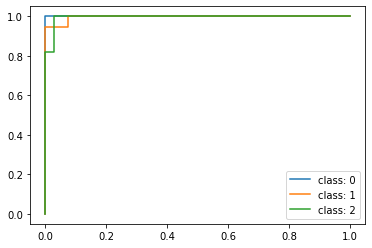

In [64]:
# それぞれのクラスのROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
    plt.legend()

### np.interpの例

In [65]:
all_x = np.arange(7)
data_x = [0, 2, 5, 6]
data_y = [0, 2, 4, 6]
np.interp(all_x, data_x, data_y)

array([0.        , 1.        , 2.        , 2.66666667, 3.33333333,
       4.        , 6.        ])

In [70]:
# 必要なxの値のリスト
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# 線形補完
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    # np.array(np.interp) を np.array(mean_tpr) に 加算
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
# クラス数で除算し, 平均値を計算
mean_tpr = mean_tpr / n_classes

In [72]:
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

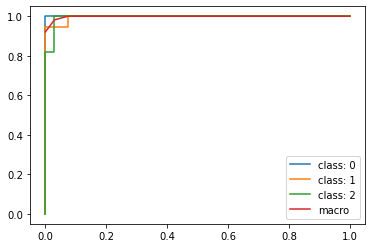

In [73]:
# それぞれのクラスとmacro平均のROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()

### micro平均

In [74]:
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

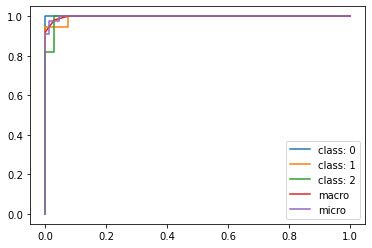

In [75]:
# それぞれのクラスとmacro平均とmicro平均のROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.plot(fpr['micro'], tpr['micro'], label='micro')
plt.legend()